# Sampling From Probability Distributions In Python

This notebook demonstrates 3 tools available to generate random samples from probability distributions:

1. [Using `random`][1]
2. [Using `numpy.random`][2]
3. [Using `scipy.stats`][3]

[1]: #1.-Using-random
[2]: #2.-Using-numpy.random
[3]: #3.-Using-scipy.stats

In [1]:
import seaborn as sns
import random
import numpy as np
import scipy

In [2]:
SAMPLE_SIZE = 1000


def plot(data, title=''):
    """Plots a combined histogram and kernel-density-estimation plot.
    """
    fig = sns.displot(data, kde=True)
    fig.ax.set_title(title, size=14)

# 1. Using `random`

The [random][1] module has the advantage of being a part of the *Python Standard Library*, so it is readily available for use - no need for installation.

However, only a single value is returned. Therefore, in order to obtain a sample of desired size $n$, you'll have to repeatedly execute the functions.

[1]: https://docs.python.org/3/library/random.html#real-valued-distributions


### 1.1 Normal Distribution

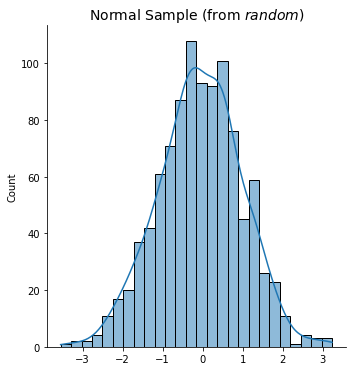

In [3]:
random_normal = [random.gauss(mu=0, sigma=1) for _ in range(SAMPLE_SIZE)]
plot(random_normal, title='Normal Sample (from $random$)')

### 1.2 Uniform Distribution

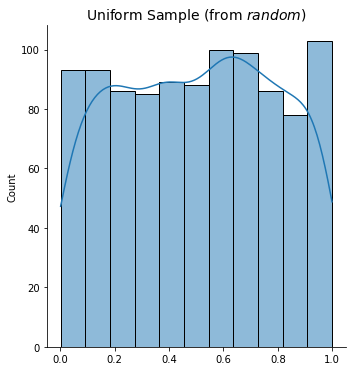

In [4]:
random_uniform = [random.uniform(a=0, b=1) for _ in range(SAMPLE_SIZE)]
plot(random_uniform, title='Uniform Sample (from $random$)')

### 1.3 Exponential Distribution

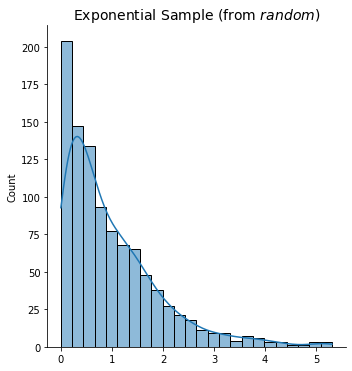

In [5]:
random_exponential = [random.expovariate(lambd=1) for _ in range(SAMPLE_SIZE)]
plot(random_exponential, title='Exponential Sample (from $random$)')

Additional options include:

- `random.triangular(low, high, mode)`
- `random.betavariate(alpha, beta)`
- `random.gammavariate(alpha, beta)`
- `random.lognormvariate(mu, sigma)`
- `random.vonmisesvariate(mu, kappa)`
- `random.paretovariate(alpha)`
- `random.weibullvariate(alpha, beta)`


# 2. Using `numpy.random`

[NumPy][1] is a third-party package - it has to be installed. The [`numpy.random`][2] sub-package can be used to generate samples from probability distributions.

*NumPy* provides data structures that allow fast operations ([learn more][3]).

[1]: https://numpy.org/doc/stable/user/index.html
[2]: https://numpy.org/doc/stable/reference/random/generator.html
[3]: https://numpy.org/doc/stable/user/whatisnumpy.html

### 2.1 Normal Distribution

`loc` is the *mean*, `scale` is the *standard deviation*

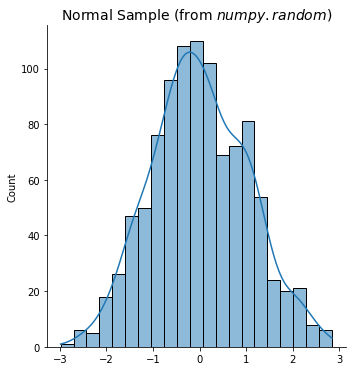

In [6]:
rng = np.random.default_rng(12345)

random_normal = np.random.normal(loc=0, scale=1, size=SAMPLE_SIZE)
plot(random_normal, title='Normal Sample (from $numpy.random$)')

Another advantage of *NumPy* is that it's arrays are equiped with methods to obtain statistics e.g:

In [7]:
dict(mean=random_normal.mean(), standard_deviation=random_normal.std(),
     range=random_normal.ptp(), min=random_normal.min(), max=random_normal.max())

{'mean': 0.009327446147338082,
 'standard_deviation': 1.0267190670533148,
 'range': 5.829730525784694,
 'min': -2.983253805356005,
 'max': 2.8464767204286883}

### 2.2 Uniform Distribution

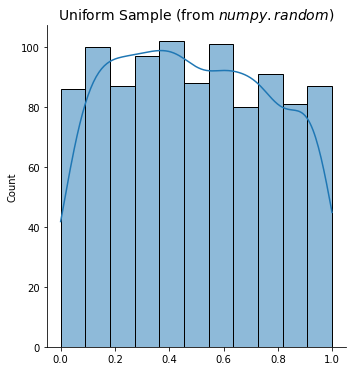

In [8]:
random_uniform = rng.uniform(low=0, high=1, size=SAMPLE_SIZE)
plot(random_uniform, title='Uniform Sample (from $numpy.random$)')

### 2.3 Exponential Distribution

`scale` $\beta = 1/\lambda$

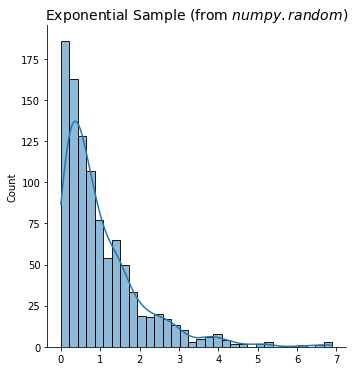

In [9]:
random_exponential = rng.exponential(scale=1, size=SAMPLE_SIZE)
plot(random_exponential, title='Exponential Sample (from $numpy.random$)')

# 3. Using `scipy.stats`

[SciPy][1] is also a third-party package that has to be installed. It is closely knit with *NumPy*.

The [`scipy.stats`][2] sub-package provides methods to generate random samples from probability distributions.

[1]: https://docs.scipy.org/doc/scipy/reference/index.html
[2]: https://docs.scipy.org/doc/scipy/reference/stats.html

### 3.1 Normal Distribution

`loc` is the *mean*, `scale` is the *standard deviation*

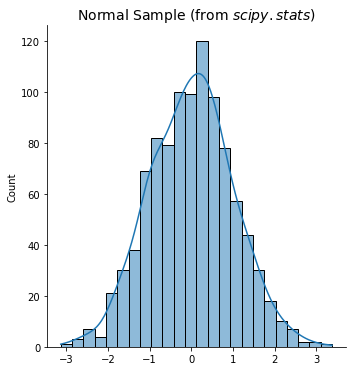

In [10]:
random_normal = scipy.stats.norm.rvs(loc=0, scale=1, size=SAMPLE_SIZE)
plot(random_normal, title='Normal Sample (from $scipy.stats$)')

### 3.2 Uniform Distribution

`loc` is the *lower boundary* $a$, `scale` is the *range* $b - a$

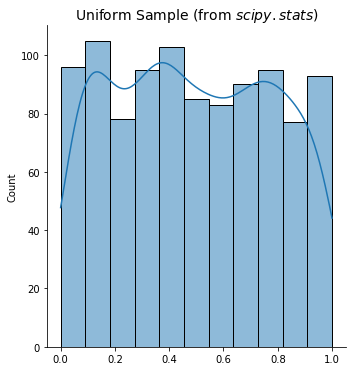

In [11]:
random_uniform = scipy.stats.uniform.rvs(loc=0, scale=1, size=SAMPLE_SIZE)
plot(random_uniform, title='Uniform Sample (from $scipy.stats$)')

### 3.3 Exponential Distribution

`scale` $\beta = 1/\lambda$

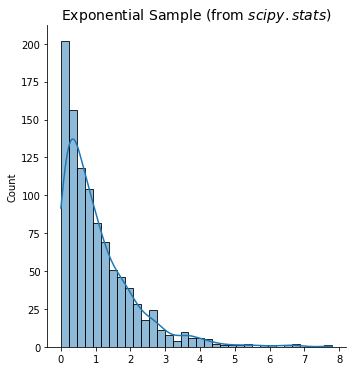

In [12]:
random_exponential = scipy.stats.expon.rvs(scale=1, size=SAMPLE_SIZE)
plot(random_exponential, title='Exponential Sample (from $scipy.stats$)')